# Import the necessary modules

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
import pickle


# Loading the data

In [2]:
# Loading the data

df = pd.read_csv("sqli.csv",encoding='utf-16')

X = df['Sentence']
y = df['Label']

# Trying different types of vectorizers

In [3]:
#count_vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
#X = count_vectorizer.fit_transform(X.values.astype('U')).toarray()

In [4]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df = 0.7, stop_words = stopwords.words('english'))
X = tfidf_vectorizer.fit_transform(X.values.astype('U')).toarray()

# Split the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Trying out different algorithms

## Naive Bayes

In [6]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = nb_classifier.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

Accuracy of Naive Bayes on test set : 0.9676300578034682
F1 Score of Naive Bayes on test set : 0.9426229508196721


In [8]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [9]:
sensitivity = TP / float(FN + TP)
print("Sensitivity:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity:",specificity)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
print ("Precision:",precision)

Sensitivity: 0.9829059829059829
Specificity: 0.9619651347068146
Precision: 0.905511811023622


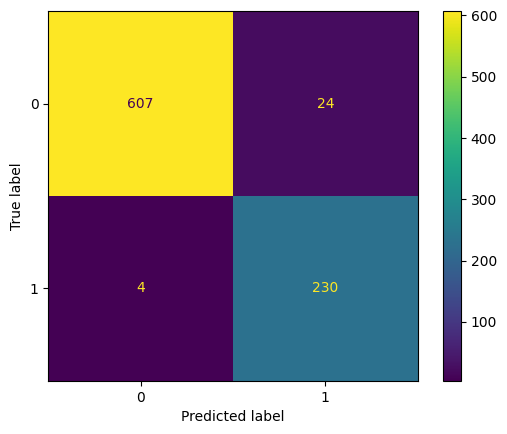

In [10]:
ConfusionMatrixDisplay(cm,display_labels=nb_classifier.classes_).plot()

In [11]:
log_regression_classifier = LogisticRegression()
log_regression_classifier.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = log_regression_classifier.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

Accuracy of Naive Bayes on test set : 0.922543352601156
F1 Score of Naive Bayes on test set : 0.8329177057356608


In [13]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [14]:
sensitivity = TP / float(FN + TP)
print("Sensitivity:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity:",specificity)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
print ("Precision:",precision)

Sensitivity: 0.7136752136752137
Specificity: 1.0
Precision: 1.0


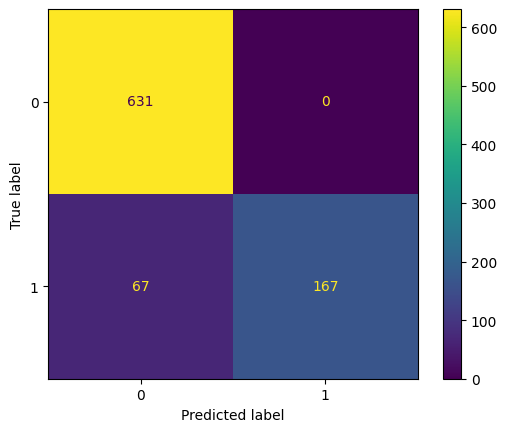

In [15]:
ConfusionMatrixDisplay(cm,display_labels=nb_classifier.classes_).plot()

In [16]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = random_forest_classifier.predict(X_test)
print(f"Accuracy of Random Forest Classifier on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest Classifier on test set : {f1_score(y_pred, y_test)}")

Accuracy of Random Forest Classifier on test set : 0.922543352601156
F1 Score of Random Forest Classifier on test set : 0.8747663551401869


In [18]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [19]:
sensitivity = TP / float(FN + TP)
print("Sensitivity:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity:",specificity)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
print ("Precision:",precision)

Sensitivity: 1.0
Specificity: 0.8938193343898574
Precision: 0.7774086378737541


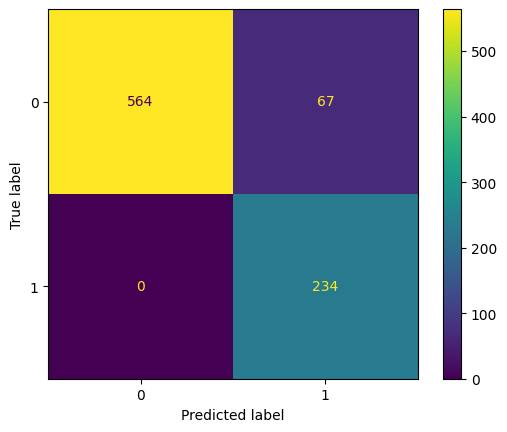

In [20]:
ConfusionMatrixDisplay(cm,display_labels=nb_classifier.classes_).plot()

In [21]:
pa_classifier=PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [22]:
y_pred = pa_classifier.predict(X_test)
print(f"Accuracy of Passive Aggressive Classifier on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Passive Aggressive Classifier on test set : {f1_score(y_pred, y_test)}")

Accuracy of Passive Aggressive Classifier on test set : 0.9352601156069364
F1 Score of Passive Aggressive Classifier on test set : 0.8647342995169082


In [23]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [24]:
sensitivity = TP / float(FN + TP)
print("Sensitivity:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity:",specificity)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
print ("Precision:",precision)

Sensitivity: 0.7649572649572649
Specificity: 0.9984152139461173
Precision: 0.9944444444444445


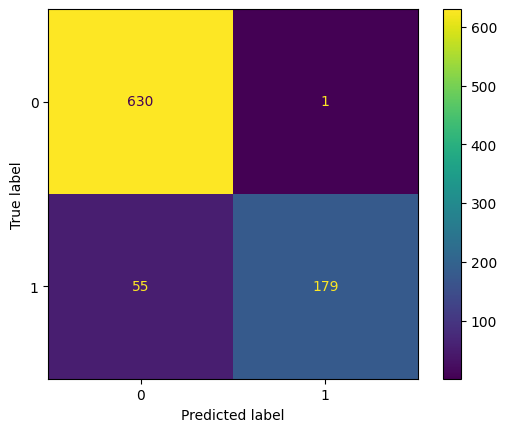

In [25]:
ConfusionMatrixDisplay(cm,display_labels=pa_classifier.classes_).plot()

In [26]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [27]:
y_pred = svc_classifier.predict(X_test)
print(f"Accuracy of SVC on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVC on test set : {f1_score(y_pred, y_test)}")

Accuracy of SVC on test set : 0.96878612716763
F1 Score of SVC on test set : 0.9443298969072165


In [28]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [29]:
sensitivity = TP / float(FN + TP)
print("Sensitivity:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity:",specificity)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
print ("Precision:",precision)

Sensitivity: 0.9786324786324786
Specificity: 0.96513470681458
Precision: 0.9123505976095617


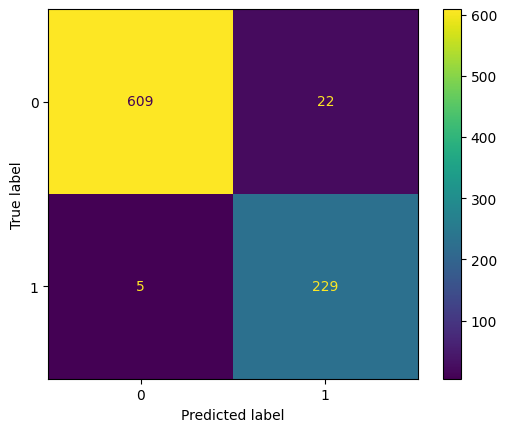

In [30]:
ConfusionMatrixDisplay(cm,display_labels=svc_classifier.classes_).plot()

# Saving the best performing model

In [31]:
# save the model to disk
model_filename = 'sqli_model.h5'
pickle.dump(nb_classifier, open(model_filename, 'wb'))

In [32]:
# saving the vocabulary to the disk
voc_output_filename = 'sqli_vocabulary.pkl'
pickle.dump(tfidf_vectorizer.vocabulary_,open(voc_output_filename,'wb'))

In [33]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

NameError: name 'filename' is not defined

In [ ]:
user_input_array=["1234 ' AND 1 = 0 UNION ALL SELECT 'admin', 'orhan"]

In [ ]:
input_vectorizer = TfidfVectorizer(vocabulary=tfidf_vectorizer.vocabulary_)
vectorized_input = input_vectorizer.fit_transform(user_input_array).toarray()


In [ ]:
vectorized_input=vectorized_input.reshape(1,-1)

In [ ]:
predictions=loaded_model.predict(vectorized_input)

In [ ]:
predictions[0]